### Concrete Compressive Strength Predicton:

### Import the necessary libraries

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


### Importing the Dataset

In [20]:
df = pd.read_csv("C:\\Users\\lenovo\\Downloads\\concrete.csv")


In [21]:
df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


In [22]:
df.duplicated().sum()

25

In [23]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1025    False
1026    False
1027    False
1028    False
1029    False
Length: 1030, dtype: bool

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [25]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [26]:
df.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [27]:
df.select_dtypes(include=["int","float"]).columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

### Exploratory Data Analysis:

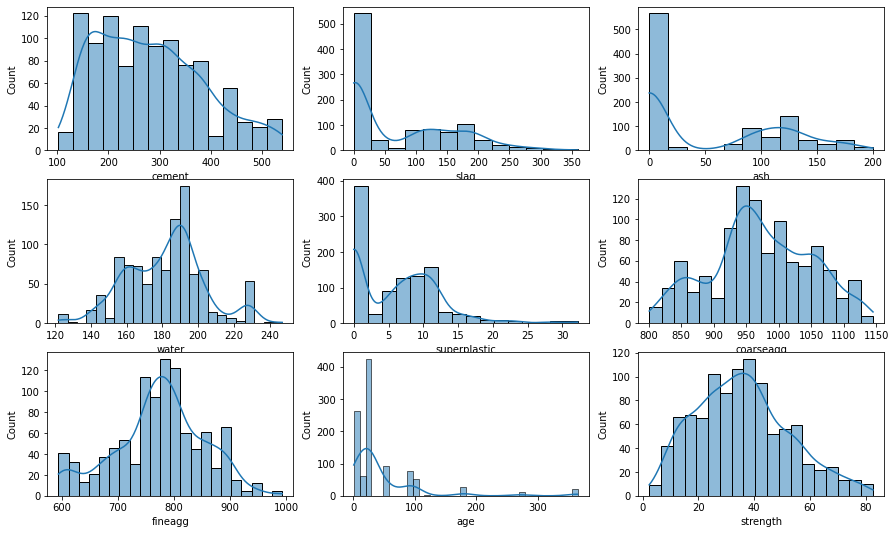

In [28]:
plt.figure(figsize=(15,9))
for i,j in enumerate(df.columns):
    plt.subplot(3,3,i+1)
    sns.histplot(df[j],kde=True)

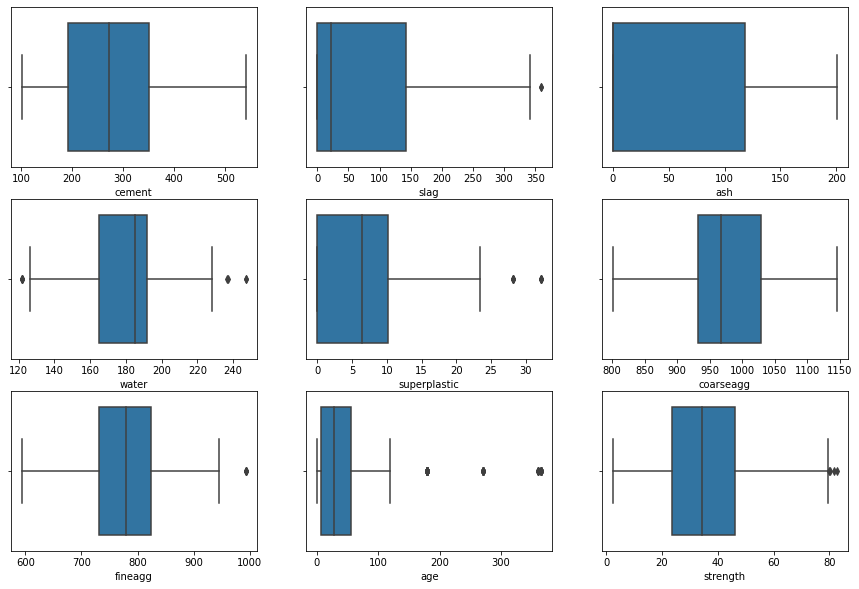

In [29]:
plt.figure(figsize=(15,10))
for i,j in enumerate(df.columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=df[j])

### Outliers Treatment Using Inter Quartile Range(IQR)

In [30]:
Q1=df["water"].quantile(0.25)
Q3=df["water"].quantile(0.75)
IQR=Q3 - Q1
lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR


new_water=[]
for i in df["water"]:
    if  (i>upper_bound):
           new_water.append(upper_bound)
    elif (i<lower_bound):
        new_water.append(lower_bound)
    else:
         new_water.append(i)

df["water"]=new_water

In [31]:
Q1=df["age"].quantile(0.25)
Q3=df["age"].quantile(0.75)
IQR=Q3 - Q1
lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR


new_age=[]
for i in df["age"]:
    if  (i>upper_bound):
           new_age.append(upper_bound)
    elif (i<lower_bound):
        new_age.append(lower_bound)
    else:
         new_age.append(i)

df["age"]=new_age

In [32]:
Q1=df["superplastic"].quantile(0.25)
Q3=df["superplastic"].quantile(0.75)
IQR=Q3 - Q1
lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR


new_superplastic=[]
for i in df["superplastic"]:
    if  (i>upper_bound):
           new_superplastic.append(upper_bound)
    elif (i<lower_bound):
        new_superplastic.append(lower_bound)
    else:
         new_superplastic.append(i)

df["superplastic"]=new_superplastic

In [33]:
Q1=df["fineagg"].quantile(0.25)
Q3=df["fineagg"].quantile(0.75)
IQR=Q3 - Q1
lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR


new_fineagg=[]
for i in df["fineagg"]:
    if  (i>upper_bound):
           new_fineagg.append(upper_bound)
    elif (i<lower_bound):
        new_fineagg.append(lower_bound)
    else:
         new_fineagg.append(i)

df["fineagg"]=new_fineagg

In [34]:
Q1=df["slag"].quantile(0.25)
Q3=df["slag"].quantile(0.75)
IQR=Q3 - Q1
lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR


new_slag=[]
for i in df["slag"]:
    if  (i>upper_bound):
           new_slag.append(upper_bound)
    elif (i<lower_bound):
        new_slag.append(lower_bound)
    else:
         new_slag.append(i)

df["slag"]=new_slag

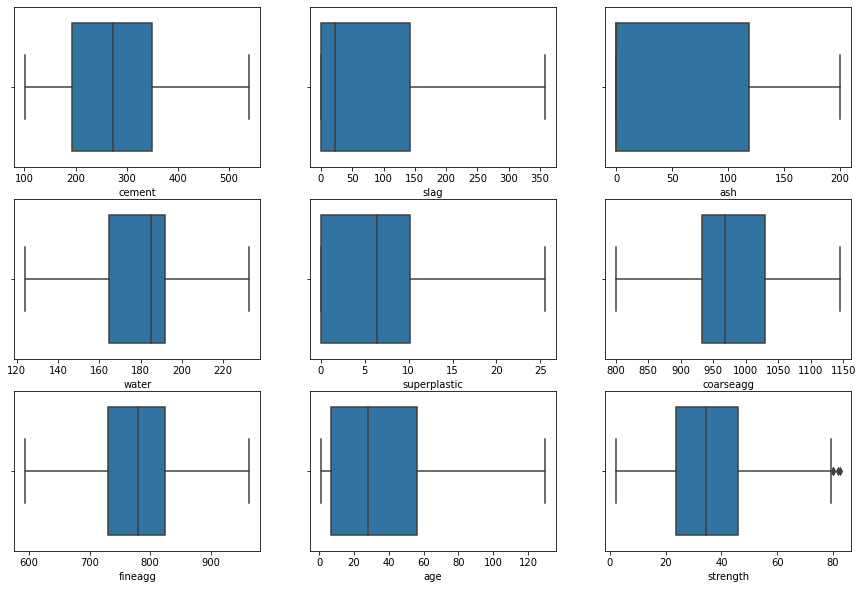

In [35]:
plt.figure(figsize=(15,10))
for i,j in enumerate(df.columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=df[j])

### Data trance form

### a. Identifying the Target variable and Splitting into train & test

In [38]:
y=df['strength']   #target variable
X=df[['cement','slag','ash','water','superplastic','coarseagg','fineagg','age']]

In [39]:
X.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= 0.8, random_state= 100)

In [41]:
X_train.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
337,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,91.0
384,236.0,0.0,0.0,194.0,0.0,968.0,885.0,90.0
805,359.0,19.0,141.0,154.0,10.9,942.0,801.0,7.0
682,202.0,11.0,141.0,206.0,1.7,942.0,801.0,7.0
329,304.0,76.0,0.0,228.0,0.0,932.0,670.0,28.0


In [42]:
y

0       29.89
1       23.51
2       29.22
3       45.85
4       18.29
        ...  
1025    13.29
1026    41.30
1027    44.28
1028    55.06
1029    52.61
Name: strength, Length: 1030, dtype: float64

In [43]:
print(X_train.shape,y_train.shape)
print( X_test.shape, y_test.shape)


(824, 8) (824,)
(206, 8) (206,)


###  b .Separating Numerical and Categorical columns

In [44]:
X_train_cat = X_train.select_dtypes(include=["object"])
X_train_num = X_train.select_dtypes(include=["int","float"])

In [45]:
X_train_cat.head()

""
337
384
805
682
329


In [46]:
X_train_num.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
337,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,91.0
384,236.0,0.0,0.0,194.0,0.0,968.0,885.0,90.0
805,359.0,19.0,141.0,154.0,10.9,942.0,801.0,7.0
682,202.0,11.0,141.0,206.0,1.7,942.0,801.0,7.0
329,304.0,76.0,0.0,228.0,0.0,932.0,670.0,28.0


### c. Standardization of  numerical features in the train data

In [47]:
X_train_num.head()


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
337,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,91.0
384,236.0,0.0,0.0,194.0,0.0,968.0,885.0,90.0
805,359.0,19.0,141.0,154.0,10.9,942.0,801.0,7.0
682,202.0,11.0,141.0,206.0,1.7,942.0,801.0,7.0
329,304.0,76.0,0.0,228.0,0.0,932.0,670.0,28.0


In [48]:
X_train_num

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
337,286.3,200.9,0.0,144.7,11.2,1004.6,803.7,91.0
384,236.0,0.0,0.0,194.0,0.0,968.0,885.0,90.0
805,359.0,19.0,141.0,154.0,10.9,942.0,801.0,7.0
682,202.0,11.0,141.0,206.0,1.7,942.0,801.0,7.0
329,304.0,76.0,0.0,228.0,0.0,932.0,670.0,28.0
...,...,...,...,...,...,...,...,...
802,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28.0
53,234.0,156.0,0.0,189.0,5.9,981.0,760.0,28.0
350,173.0,116.0,0.0,192.0,0.0,946.8,856.8,90.0
79,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,56.0


In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_num_scaled = pd.DataFrame(scaler.fit_transform(X_train_num),
                                 columns= X_train_num.columns,
                                 index = X_train_num.index)
X_train_num_scaled.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
337,0.008917,1.522206,-0.839174,-1.744964,0.861150,0.406704,0.396612,1.538436
384,-0.467412,-0.845036,-0.839174,0.560629,-1.040593,-0.064001,1.405224,1.509915
805,0.697368,-0.621155,1.391731,-1.310035,0.810211,-0.398382,0.363115,-0.857298
682,-0.789384,-0.715421,1.391731,1.121828,-0.751935,-0.398382,0.363115,-0.857298
329,0.176532,0.050486,-0.839174,2.150692,-1.040593,-0.526991,-1.262078,-0.258364


### d. Preparing the test data

In [50]:
X_test_num = X_test.select_dtypes(include=["int","float"])

In [51]:
X_test_num

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
173,276.0,116.0,90.0,180.0,9.0,870.0,768.0,28.0
134,339.0,0.0,0.0,197.0,0.0,968.0,781.0,3.0
822,382.5,0.0,0.0,185.7,0.0,1047.8,739.3,7.0
264,366.0,187.0,0.0,191.3,6.6,824.3,756.9,28.0
479,173.8,93.4,159.9,172.3,9.7,1007.2,746.6,100.0
...,...,...,...,...,...,...,...,...
247,213.7,0.0,174.7,154.8,10.2,1053.5,776.4,28.0
207,190.0,190.0,0.0,228.0,0.0,932.0,670.0,129.5
672,339.2,0.0,0.0,185.7,0.0,1069.2,754.3,28.0
191,218.2,54.6,123.8,140.8,11.9,1075.7,792.7,56.0


### e. Scaling the Numerical values

In [52]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
173,-0.088622,0.521813,0.584808,-0.094104,0.487594,-1.324361,-0.046284,-0.258364
134,0.507973,-0.845036,-0.839174,0.700928,-1.040593,-0.064001,0.114994,-0.971380
822,0.919908,-0.845036,-0.839174,0.172466,-1.040593,0.962292,-0.402338,-0.857298
264,0.763657,1.358419,-0.839174,0.434359,0.080077,-1.912100,-0.183992,-0.258364
479,-1.056431,0.255513,1.690767,-0.454206,0.606453,0.440143,-0.311774,1.795121


### Applying Algorithms

### Linear Regression:

In [53]:
from sklearn.linear_model import LinearRegression
regressior = LinearRegression()
regressior.fit(X_train_num, y_train)

LinearRegression()

In [54]:
y_test_pred = regressior.predict(X_test_num)

In [55]:
pred_df = pd.DataFrame({"actual":y_test,"Predicted":y_test_pred})
pred_df.head()

,actual,Predicted
173,44.28,39.598619
134,13.22,18.169757
822,24.07,26.466011
264,65.91,46.406336
479,50.94,52.148513


In [56]:
from sklearn import metrics
print("Absolute Error :", metrics.mean_absolute_error(y_test,y_test_pred))
print("Mean Squre Error :",metrics.mean_squared_error(y_test,y_test_pred))
print("Root mean Square Error :",np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))


Absolute Error : 6.777125592720093
Mean Squre Error : 70.39953639681832
Root mean Square Error : 8.390443158547605


### KNN Regression:

In [57]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train_num, y_train)

KNeighborsRegressor()

In [58]:
y_test_pred = regressior.predict(X_test_num)

In [59]:
pred_df = pd.DataFrame({"actual":y_test,"Predicted":y_test_pred})
pred_df.head()

,actual,Predicted
173,44.28,39.598619
134,13.22,18.169757
822,24.07,26.466011
264,65.91,46.406336
479,50.94,52.148513


In [60]:
from sklearn import metrics
print("Absolute Error :", metrics.mean_absolute_error(y_test,y_test_pred))
print("Mean Squre Error :",metrics.mean_squared_error(y_test,y_test_pred))
print("Root mean Square Error :",np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))


Absolute Error : 6.777125592720093
Mean Squre Error : 70.39953639681832
Root mean Square Error : 8.390443158547605


### Random Forest Regression:

In [61]:
from sklearn.ensemble import RandomForestRegressor 
rfr = RandomForestRegressor(n_estimators=100) 
rfr.fit(X_train, y_train) 

RandomForestRegressor()

In [62]:
y_test_pred = regressior.predict(X_test_num)

In [63]:
from sklearn import metrics
print("Absolute Error :", metrics.mean_absolute_error(y_test,y_test_pred))
print("Mean Squre Error :",metrics.mean_squared_error(y_test,y_test_pred))
print("Root mean Square Error :",np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))


Absolute Error : 6.777125592720093
Mean Squre Error : 70.39953639681832
Root mean Square Error : 8.390443158547605


### Decision Tree Regression:

In [64]:
from sklearn.tree import DecisionTreeRegressor 
dtr = DecisionTreeRegressor() 
dtr.fit(X_train_num, y_train)

DecisionTreeRegressor()

In [65]:
y_test_pred = regressior.predict(X_test_num)

In [66]:
pred_df = pd.DataFrame({"actual":y_test,"Predicted":y_test_pred})
pred_df.head()

,actual,Predicted
173,44.28,39.598619
134,13.22,18.169757
822,24.07,26.466011
264,65.91,46.406336
479,50.94,52.148513


In [67]:
from sklearn import metrics
print("Absolute Error :", metrics.mean_absolute_error(y_test,y_test_pred))
print("Mean Squre Error :",metrics.mean_squared_error(y_test,y_test_pred))
print("Root mean Square Error :",np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))


Absolute Error : 6.777125592720093
Mean Squre Error : 70.39953639681832
Root mean Square Error : 8.390443158547605


### SVM 

In [70]:
from sklearn.svm import SVR
regressor = SVR(kernel="linear")
regressor.fit(X_train_num, y_train)

SVR(kernel='linear')

In [71]:
y_test_pred = regressior.predict(X_test_num)

In [72]:
pred_df = pd.DataFrame({"actual":y_test,"Predicted":y_test_pred})
pred_df.head()

,actual,Predicted
173,44.28,39.598619
134,13.22,18.169757
822,24.07,26.466011
264,65.91,46.406336
479,50.94,52.148513


In [73]:
from sklearn import metrics
print("Absolute Error :", metrics.mean_absolute_error(y_test,y_test_pred))
print("Mean Squre Error :",metrics.mean_squared_error(y_test,y_test_pred))
print("Root mean Square Error :",np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))


Absolute Error : 6.777125592720093
Mean Squre Error : 70.39953639681832
Root mean Square Error : 8.390443158547605


### Ridge Regression

In [74]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [76]:
regressor = Ridge(alpha = 0.1, tol = 0.001, solver ='auto', random_state = 42)
regressor.fit(X_train_num, y_train)


Ridge(alpha=0.1, random_state=42)

In [77]:
y_test_pred = regressior.predict(X_test_num)

In [78]:
pred_df = pd.DataFrame({"actual":y_test,"Predicted":y_test_pred})
pred_df.head()

,actual,Predicted
173,44.28,39.598619
134,13.22,18.169757
822,24.07,26.466011
264,65.91,46.406336
479,50.94,52.148513


In [79]:
from sklearn import metrics
print("Absolute Error :", metrics.mean_absolute_error(y_test,y_test_pred))
print("Mean Squre Error :",metrics.mean_squared_error(y_test,y_test_pred))
print("Root mean Square Error :",np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))


Absolute Error : 6.777125592720093
Mean Squre Error : 70.39953639681832
Root mean Square Error : 8.390443158547605


### Lasso Regression

In [81]:
regressor = Lasso(alpha = 0.1)
regressor.fit(X_train_num, y_train)

Lasso(alpha=0.1)

In [82]:
y_test_pred = regressior.predict(X_test_num)

In [83]:
pred_df = pd.DataFrame({"actual":y_test,"Predicted":y_test_pred})
pred_df.head()

,actual,Predicted
173,44.28,39.598619
134,13.22,18.169757
822,24.07,26.466011
264,65.91,46.406336
479,50.94,52.148513


In [84]:
from sklearn import metrics
print("Absolute Error :", metrics.mean_absolute_error(y_test,y_test_pred))
print("Mean Squre Error :",metrics.mean_squared_error(y_test,y_test_pred))
print("Root mean Square Error :",np.sqrt(metrics.mean_squared_error(y_test,y_test_pred)))


Absolute Error : 6.777125592720093
Mean Squre Error : 70.39953639681832
Root mean Square Error : 8.390443158547605
